# Plotting

## Time estimate:
**Teaching**: 15 min

**Exercises**: 15 min

## Questions
- How can I plot my data?
- How can I save my plot for publishing?

## Objectives
- Create a time series plot showing a single data set.
- Create a scatter plot showing relationship between two data sets.

## Matplotlib

[Matplotlib](https://matplotlib.org/) is, effectively, the core plotting and data visualization package in Python. Many other packages use Matplotlib for data visualization, including NumPy, SciPy, and pandas. Matplotlib is not the only visualization package in Python, by any means. There are many others, including seaborn, [Altair](https://altair-viz.github.io), [ggpy](http://yhat.github.io/ggpy/), [Bokeh](https://docs.bokeh.org/en/latest/index.html), and [plot.ly](https://plot.ly). Some of the others are actually built on top of Matplotlib, but simply the syntax for creating specific, complex types of graphics relative to what's required in Matplotlib (these are called **wrappers** for Matplotlib). Others are entirely independent. Regardless, Matplotlib is the most widely-used and flexible package for data visualization in Python, and so it's value to learn it first, and then build our your skills from there. 

Matplotlib is also a very mature Python package, having been first released in 2003 and being continuously updated since then. It has a strong development community, a detailed website with extensive documentation and many examples, and there is copious third party documentation in the form of blog posts, books, and more — much of which is freely available.

## History

As documented by Matplotlib's original developer, John Hunter, the package was originally designed to emulate the plotting abilities of [Matlab](https://www.mathworks.com/products/matlab.html), in Python. Matlab is a commercial programming language and environment, designed for — and widely used by — engineers and scientists. Hunter was conducting electrocorticography (ECoG) research and initially worked in Matlab, but encountered limitations that he wanted to work around. Because Matlab is a commercial product, rather than an open source one, development is controlled by a company (Mathworks). Although developers can write quite extensive and complex applications in Matlab, they are ultimately limited by the decisions that its developers have made. Hunter decided to switch his work to use Python, and wanted to develop a plotting interface that was similar to that used in Matlab. Indeed, this is where the "Mat" part of the name Matplotlib came from. 

## Using Matplotlib

We have previously covered how to import a Python package using the `import` command. We also covered how to import a package with an alias, using the syntax `import [pacakge] as [alias]` 

For Matplotlib, we will do this again, but we add an extra detail: Matplotlib, like many Python packages, is orgnized into a number of "modules" (essentially subsets of functions). The one that you will typically want to import for plotting is called `pyplot`. So we use the syntax below:

In [1]:
import matplotlib.pyplot as plt

Now we can draw a simple line plot by creating two lists of data points (each 4 elements long), which repersent time elpased and distance travelled by some hypothetical object:

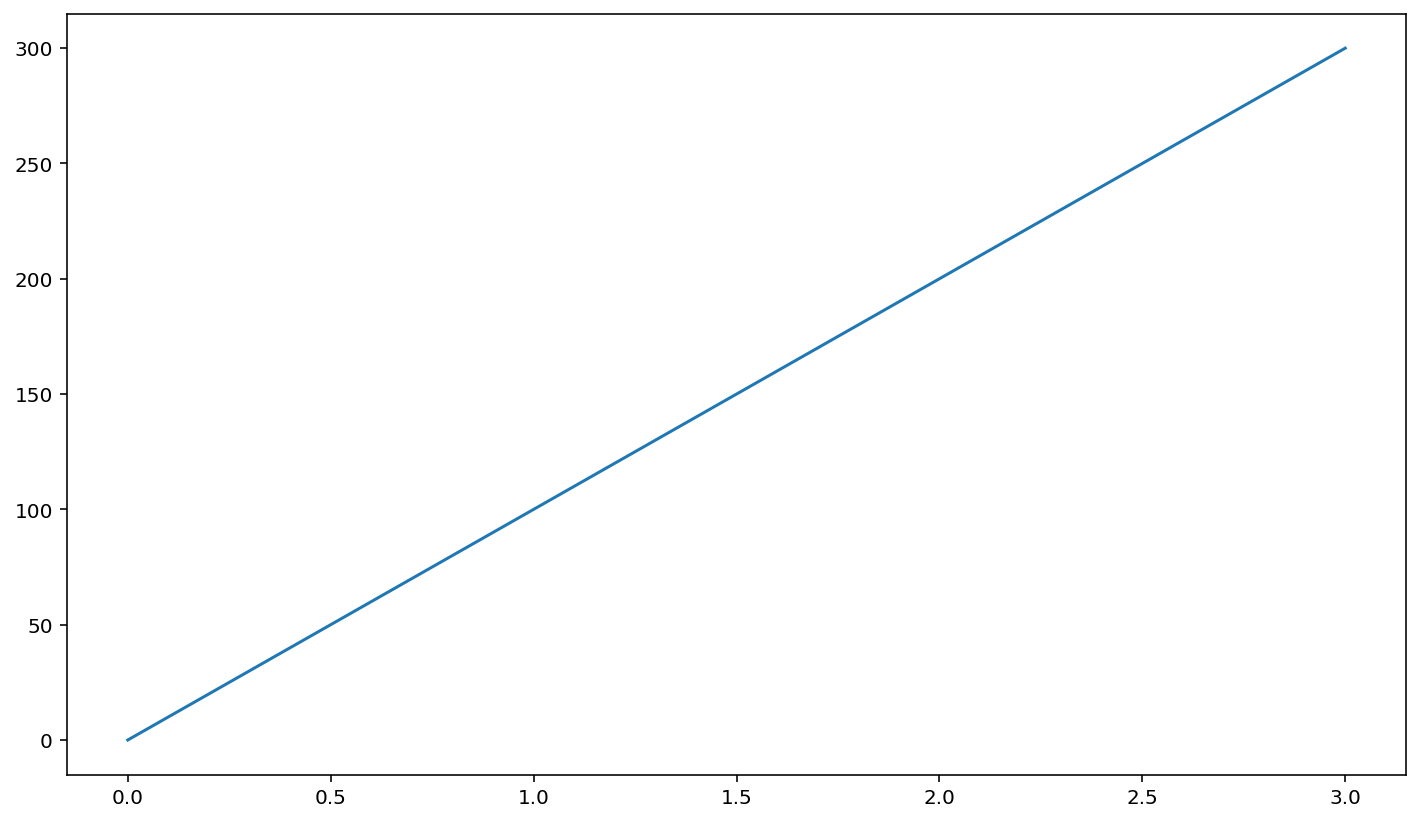

In [2]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)

You can see above that we used the Matplotlib alias `plt` followed by the name of a specific function in the package, `plot()`.

Another thing to note is that above the plot is some text, something like: `[<matplotlib.lines.Line2D at 0x7f72bc26ce20>]`. This is part of the output of the `plt.plot()` command, but typically not something that we care to see. We can generate the plot without this extra output, by including the command `plt.show()` at the end of the cell. Recall that Jupyter only shows the output of the last output-generating command in a cell, and `plt.show()` shows the plot without the extra text:

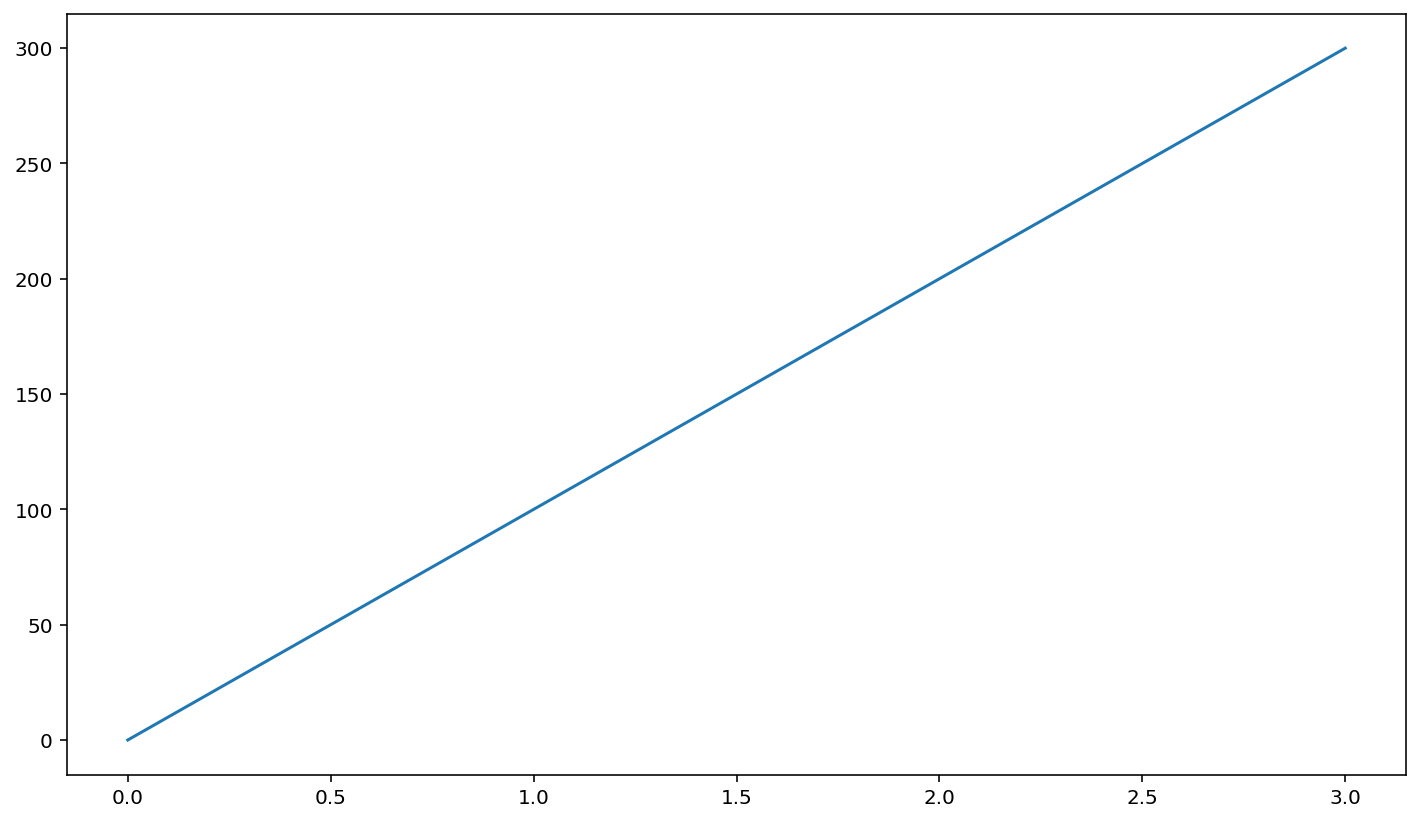

In [3]:
# since we defined time and position above, no need to re-assign them here
plt.plot(time, position)
plt.show()

Matplotlib also allows us to modify the plot in many ways, which can improve the interpretability of a plot. For example, it's always good practice to label the axes of a plot:

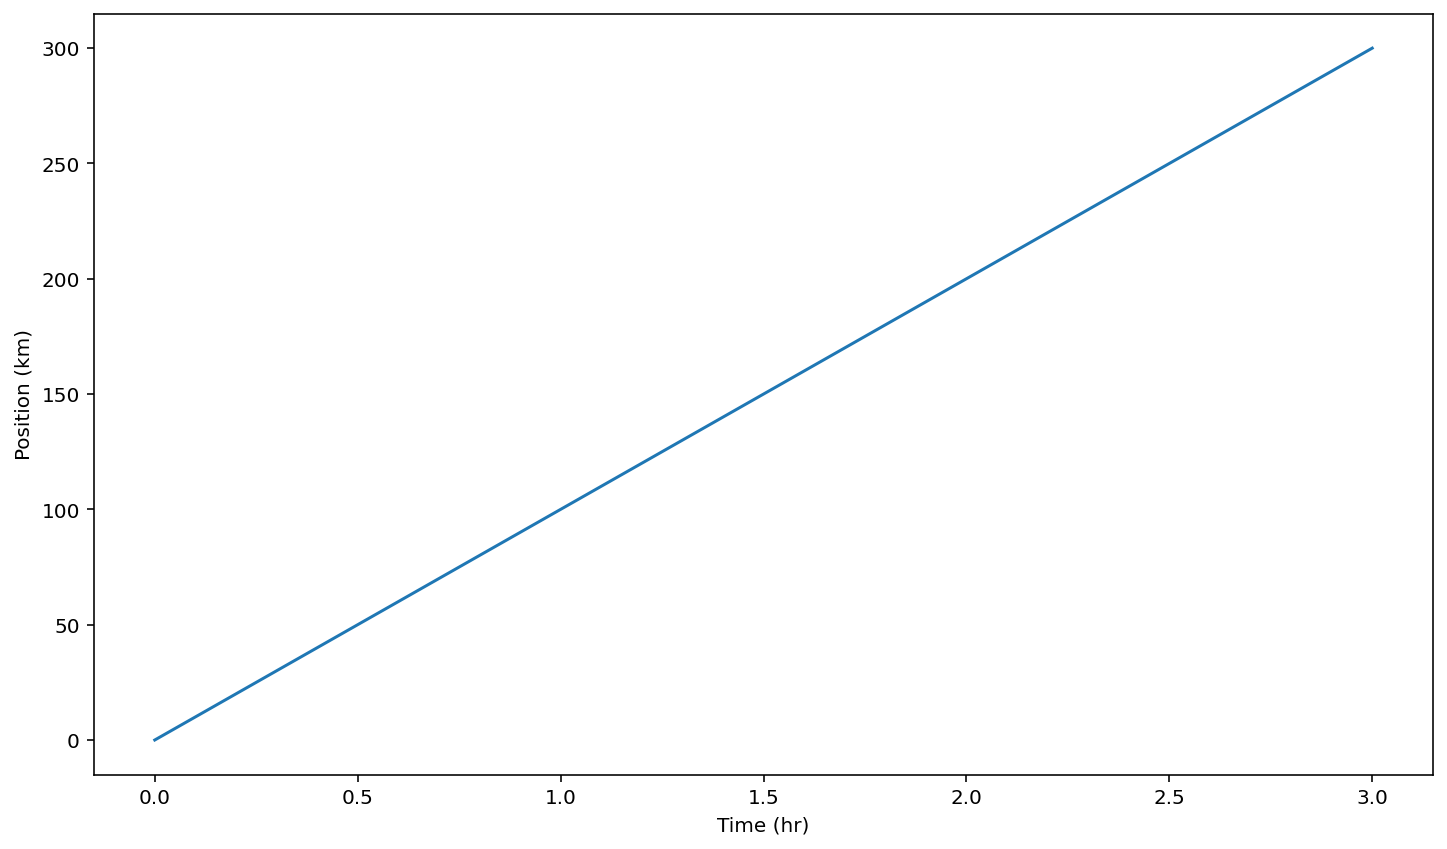

In [4]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()

## Plotting pandas DataFrames

pandas is integrated with Matplotlib, making it easy to generate plots of data stored in pandas DataFrames. 

Let's try this by first importing pandas and loading in the Gapminder Oceania data (`data/gapminder_gdp_oceania.csv`):

In [5]:
import pandas as pd

data = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

Let's remind ourselves what this DataFrame looks like:

In [6]:
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Our goal is to plot the GDP for a particular country (or countries), as a function of year. THe integration of pandas and Matplotlib will automatically use the indexes and column labels of a DataFrame for the axes of the plot. In labelling our *x* axis, it would be nice to display the actual years. We can get this from the column names in the DataFrame, but the column names in the Gapminder data sets include more text than just the year — the year is preceded by `gdpPercap_`, e.g., `gdpPercap_1972`. Since the year is always the last 4 characters in a column name, we can use the `strip()` function, which removes from the string the characters stated in the argument. This method works on strings, so we call `str` before `strip()`.

In [7]:
years = data.columns.str.strip('gdpPercap_')

# Convert year values to integers, saving results back to dataframe

data.columns = years.astype(int)

Look at the DataFrame now, to see the result:

In [8]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


## Extracting subsets of data from a DataFrame

An important skill to learn is how to specify, and extract, specific subsets of data from an entire DataFrame, which can often contain hundreds of thousands, or even millions, of data points. In plotting, we need to specify what we want on the *x* and *y* axes of our figure.

To do this, we can create new variables comprising only the parts of the DataFrame that we want to use as the *x* and *y* axes. Below we assign the `.columns` property of the DataFrame (the names of all the columns) to `years`, and we use `.loc[]` to select only the data in the `Australia` row, assigning this to `gdp_australia`.


In [21]:
years = data.columns
gdp_australia = data.loc['Australia']

Now, we can use these two variables as inputs to the `plt.plot()` command.

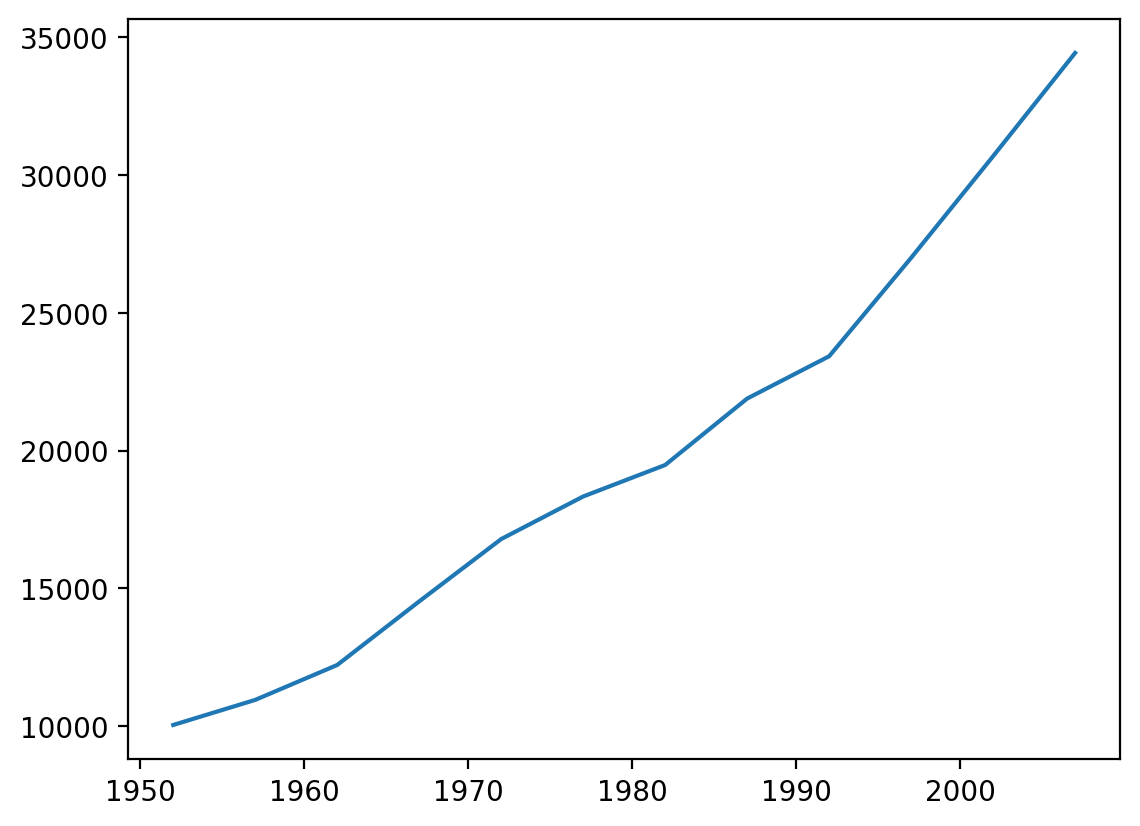

In [27]:
plt.plot(years, gdp_australia)
plt.show()

## Customizing plots

Matplotlib gives you an incredible amount of flexibility in how your plot looks. For example, we can specify the colour of the line using the keyword argument `color=`, along with a [colour name](https://matplotlib.org/3.1.0/gallery/color/named_colors.html). For example:

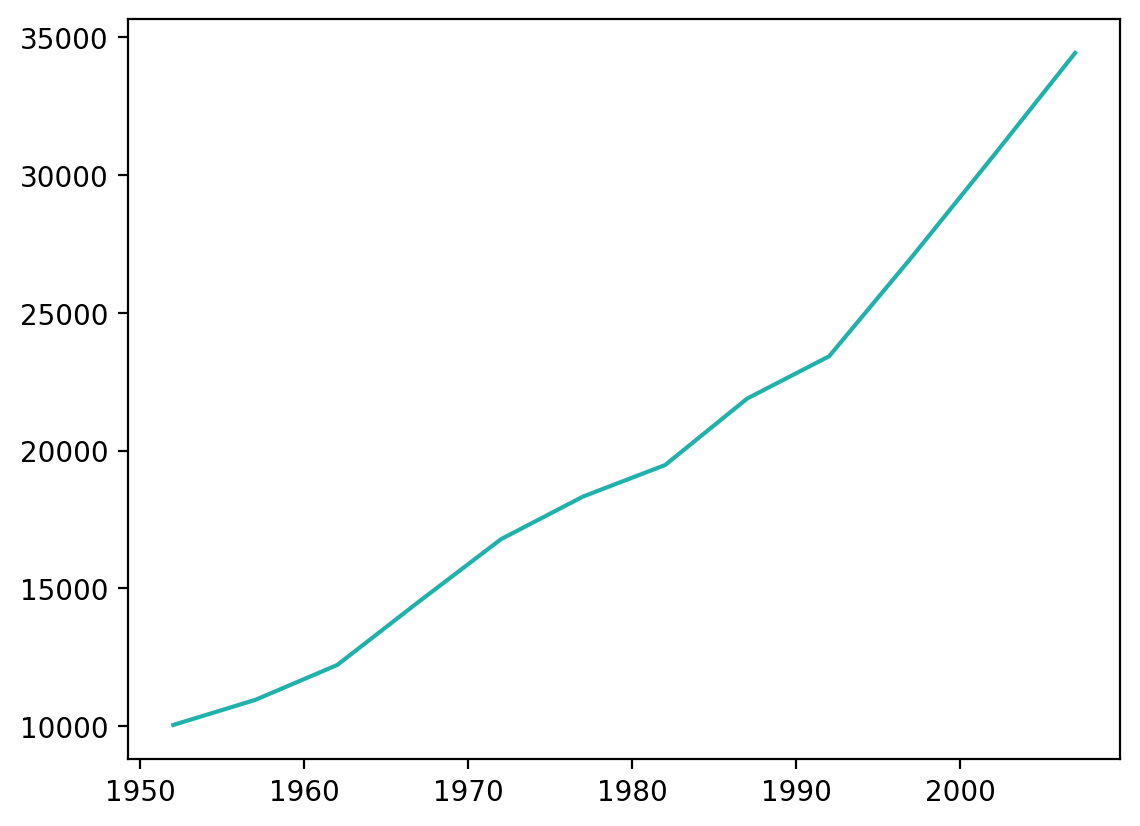

In [37]:
plt.plot(years, gdp_australia, color='lightseagreen')
plt.show()

We can also specify the [line *style*](https://matplotlib.org/2.0.2/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle), such as solid, dashed, dotted, etc.: 

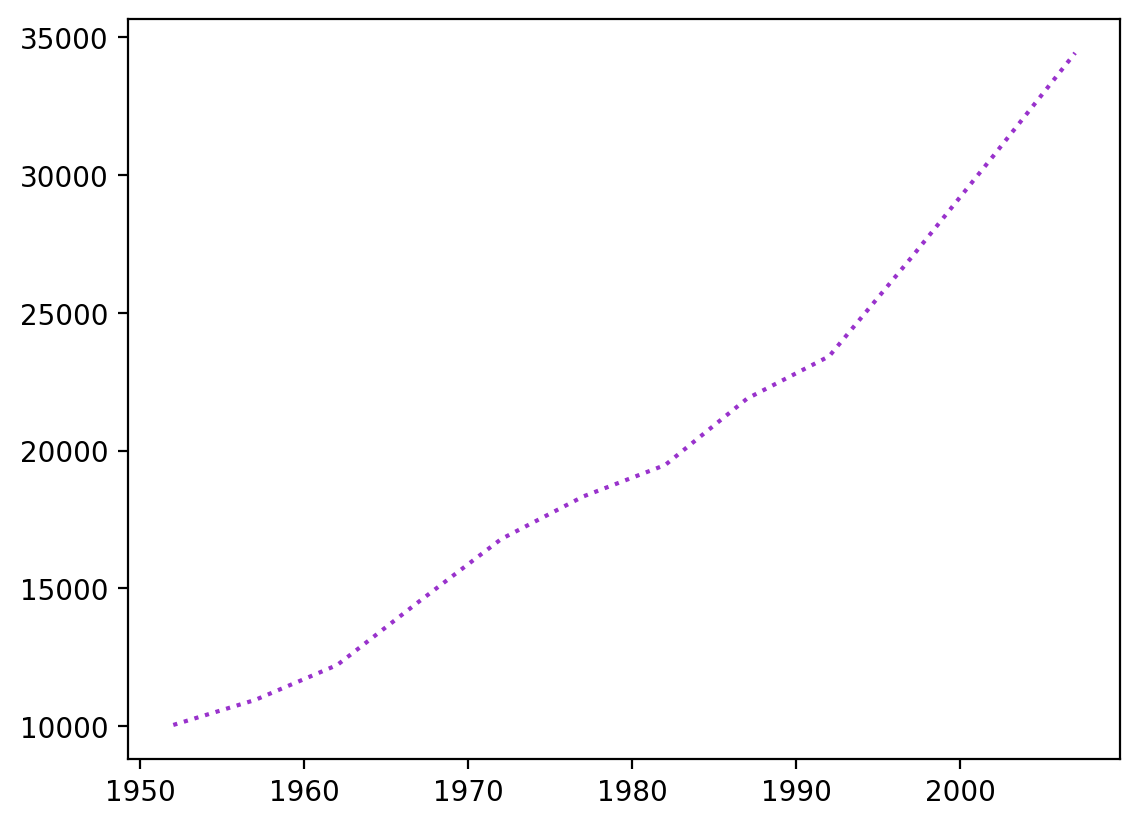

In [40]:
plt.plot(years, gdp_australia, color='darkorchid', linestyle=':')
plt.show()

---

### Keyword arguments

`color=` and `linestyle=` are a particular kind of argument to a function, called a *keyword argument* (or *kwarg*). Recall that arguments are information provided to a function that alter how it runs. kwargs are arguments that use a keyword (in this case, `kind`), followed by the `=` sign, followed by a value to pass to the argument. kwargs are commonly used for optional arguments. A Python function that takes multiple arguments needs to know how to interpret each argument. Mandatory arguments typically are required to be listed in a particular order, which allows the function to know how to interpret each one. However, optional arguments might not occur, so order would not be a good way of determining the meaning of the argument. The keywords allow the function to know how to interpret each kwarg.


# Plotting directly from a pandas DataFrame

The above method works well, but it's not terribly efficient: we have to define variables for each of our axes, and then run a plot command. It turns out pandas has a set of methods that allow you to generate Matplotlib plots. Recall that methods are applied to an input by specifying the name of the data (DataFrame) followed by the command. So for example we can plot our Oceania DataFrame using `data.plot()`:

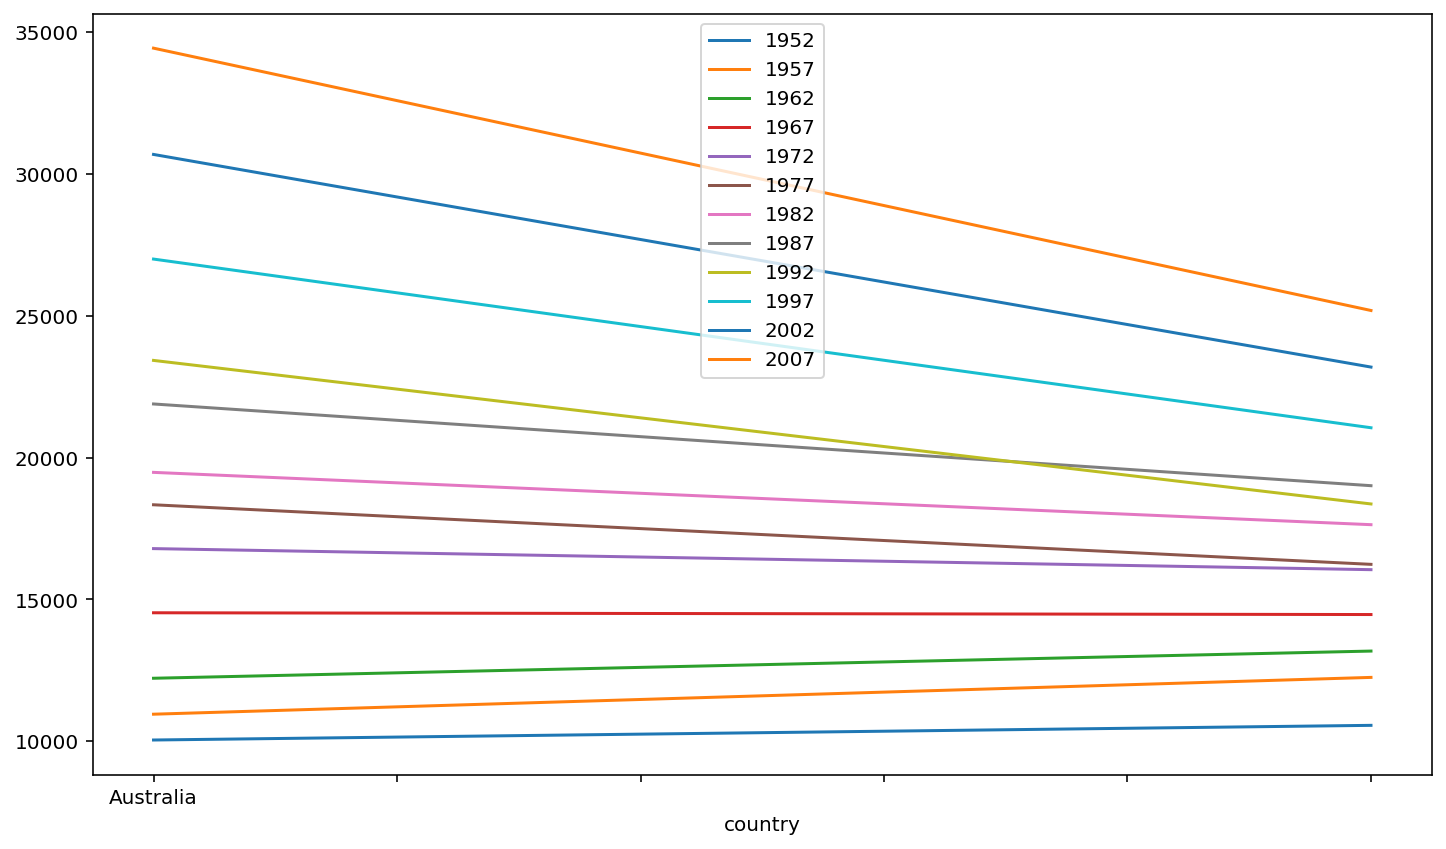

In [10]:
data.plot()
plt.show()

What happened here? 

We can see from the legend that Python generated a line for each year in the data set, with country on the *x* axis. This is because **by default, Matplotlib will use the rows of a DataFrame as the *x* axis**, and use columns to define the groupings that define individual lines. But in our DataFrame, the rows (indexes) are the countries. 

We can change this by transposing rows and columns in the DataFrame, using the `.T` operator as we saw in a pervious lesson:

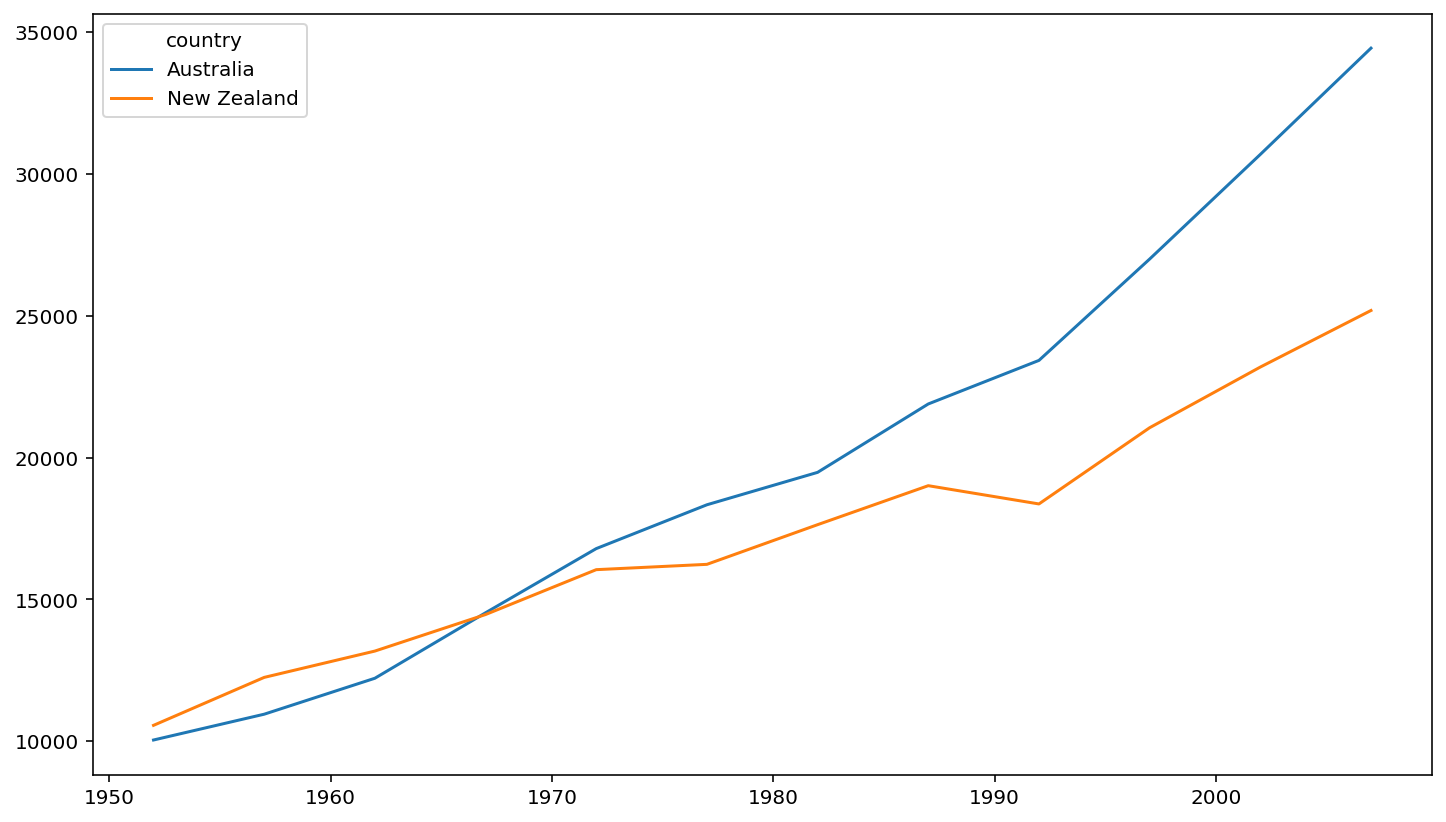

In [11]:
data.T.plot()
plt.show()

You can see above that pandas + Matplotlib also recognizes the index of the DataFrame as labels, so a legend is automatically generated with the country names.

### Selecting subsets of a DataFrame

Above we selected onlyl the data from Australia using `.loc[]`, and assigned that to `gdp_australia`. But more efficiently, using the pandas `.plot()` method, we can *chain* together the `.loc[]` selector and the `.plot()` method to select the relevant data 'on the fly' rather than first defining a variable to hold that data. 

For example we can plot the data for a specific country (Australia), by selecting it using the `.loc[]` method to select the index `Australia`:

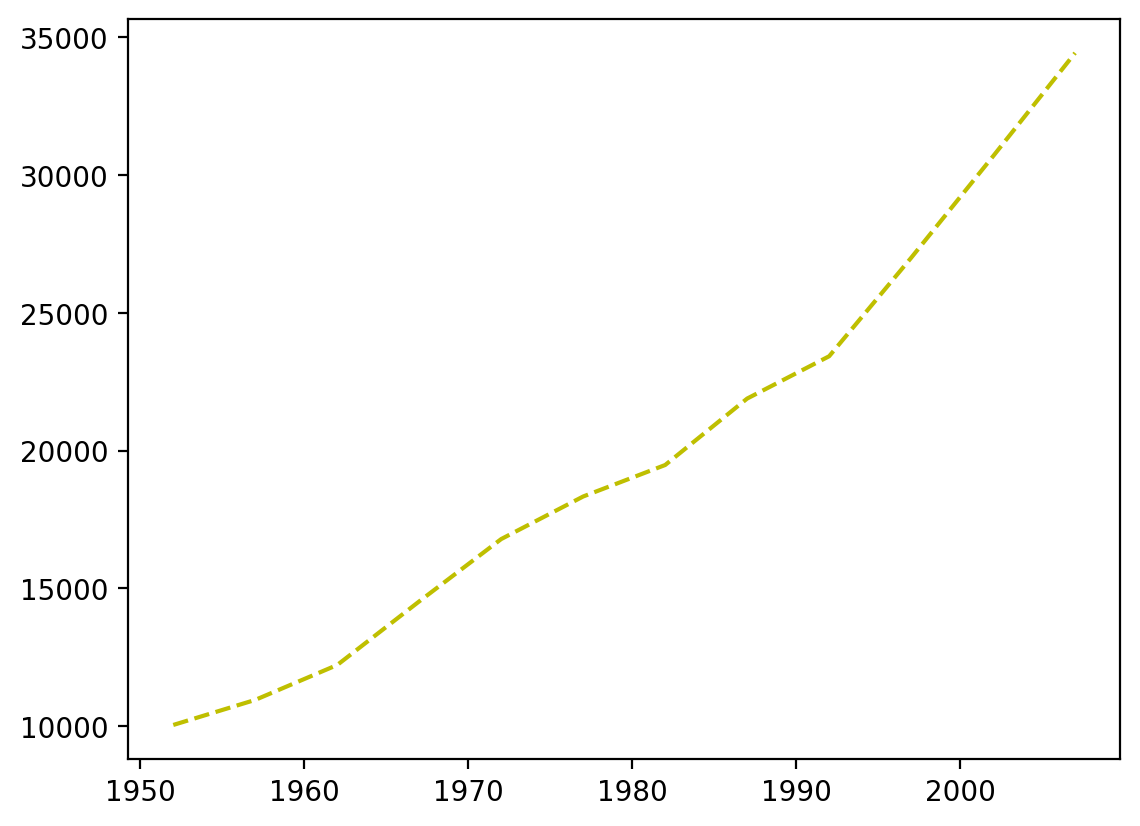

In [41]:
data.loc['Australia'].plot(color='y', linestyle='--')
plt.show()

## Types of plots

Matplotlib will make some assumptions about how to plot your data, based on the types of values it is given. However, you can override these defaults by specifying the type of plot you desire. For example, we can plot the same Gapminder data as bars, by using the keyword argument `kind='bar'`:

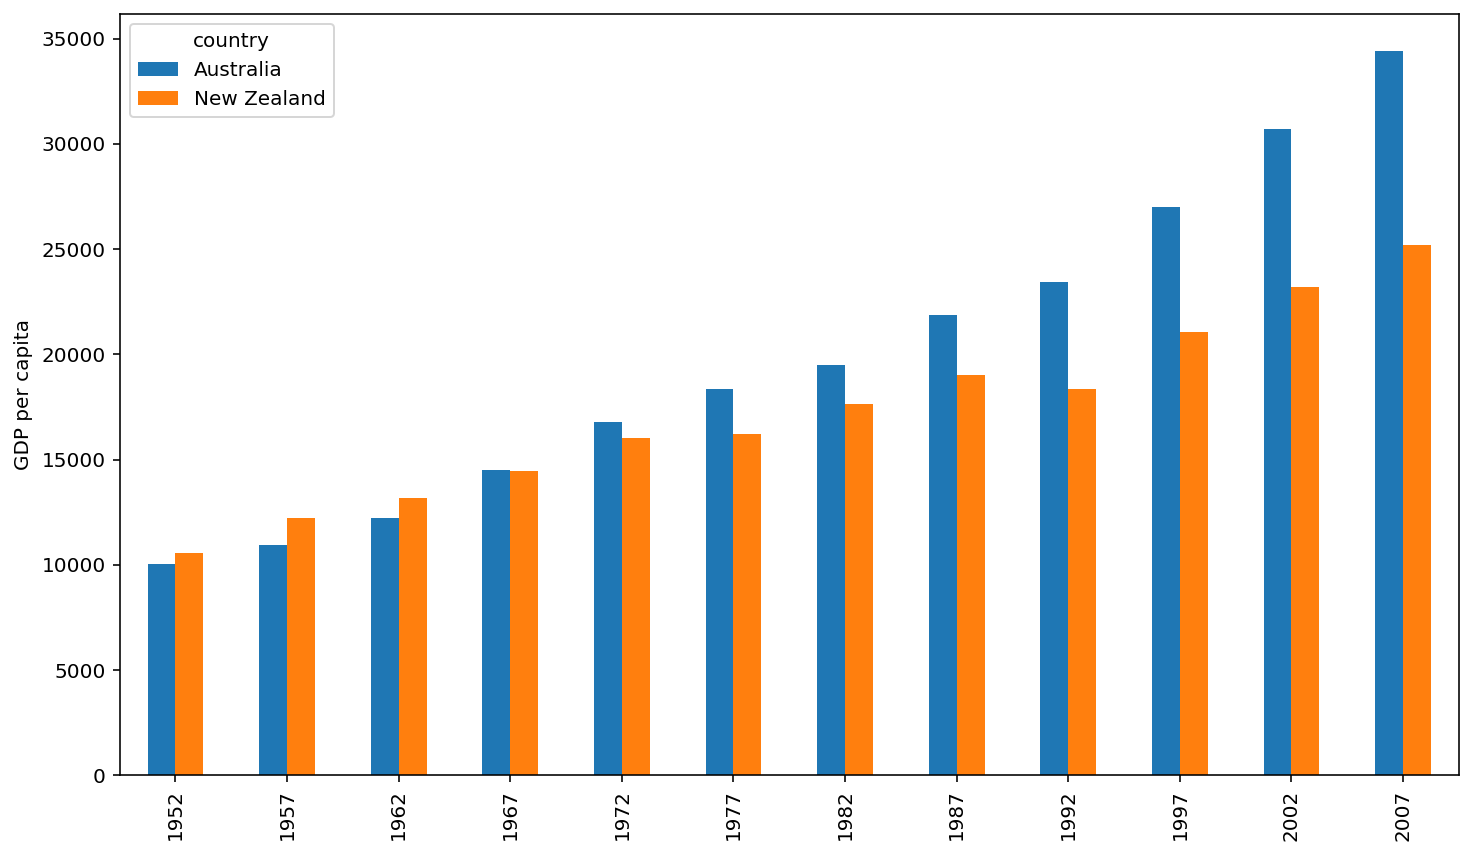

In [13]:
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.show()

Something to get used to is that some plot styles can be defined as keyword arguments to `.plot()`, as above, others can be generated using subfunctions of `.plot`, such as `.plot.scatter()`, as below. Often, you can use either one to get the same result. It's often the case in Python that there are many different ways to do the same thing! 

Below we generate a *scatterplot* to examine whether the two Oceania countries' GDPs correlate. This requires a differnt type of selection from the plots above, because here we want to use the data from one row as the *x* axis, and another row as the *y* axis — rather than using rows for groups and columns for the *x* axis. Fortunately, the pandas `.plot.scatter()` method recognizes our row names (indexes) so we just have to specify their names:

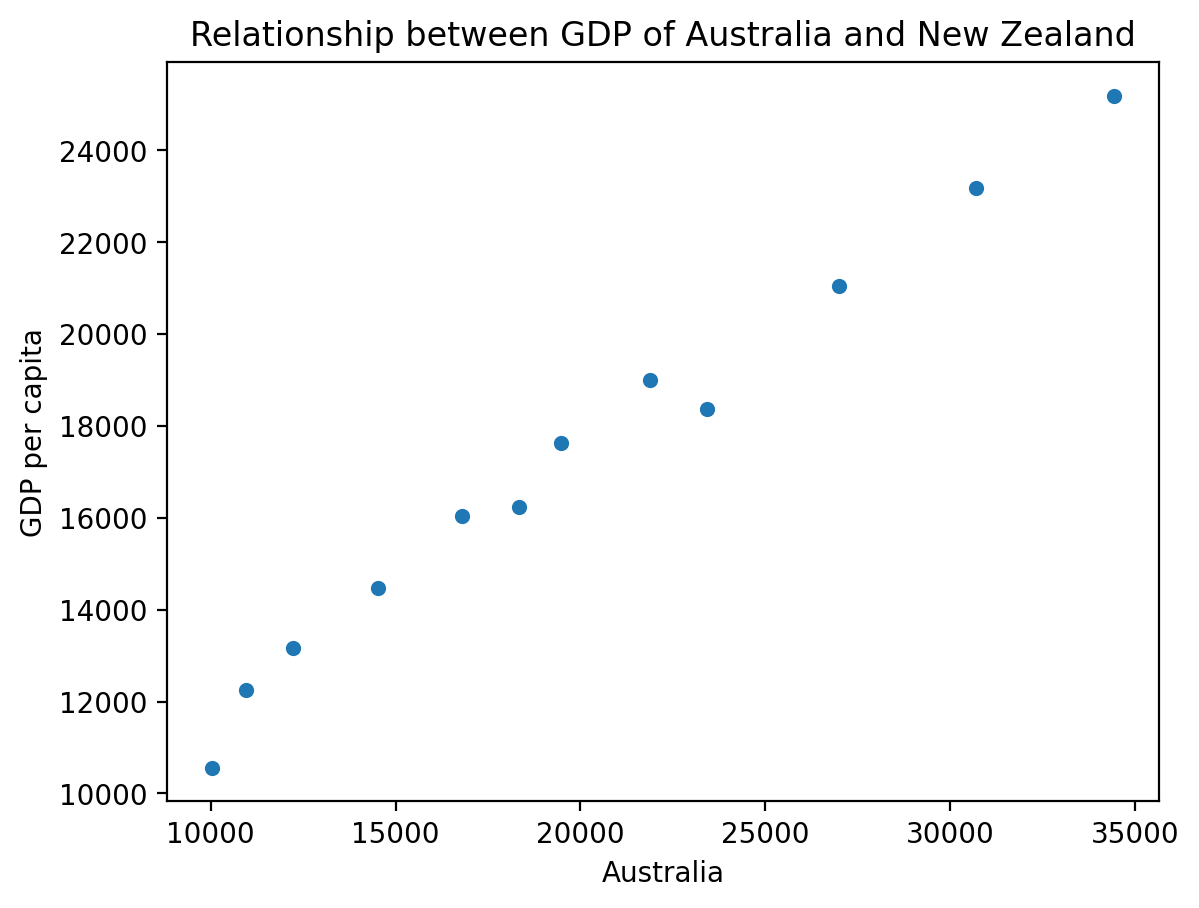

In [36]:
data.T.plot.scatter(x='Australia', y='New Zealand')
plt.ylabel('GDP per capita')
plt.title('Relationship between GDP of Australia and New Zealand')
plt.show()

## Customizing plots

Matplotlib offers many ways of customizing plots. One powerful was is using [*style sheets*](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html). These can be thought of as different colour schemes or templates for plots, which control many aspects of the plot appearance —  without the user needing to specify colours and styles for each line, or other details. This is done with a command telling Matplotlib which style to use, with the `plt.style.use()` function — which is run prior to the plot command. For instance, we can use the `ggplot` style sheet to format plots similar to *R*'s [`ggplot2`](https://ggplot2.tidyverse.org/index.html) library:

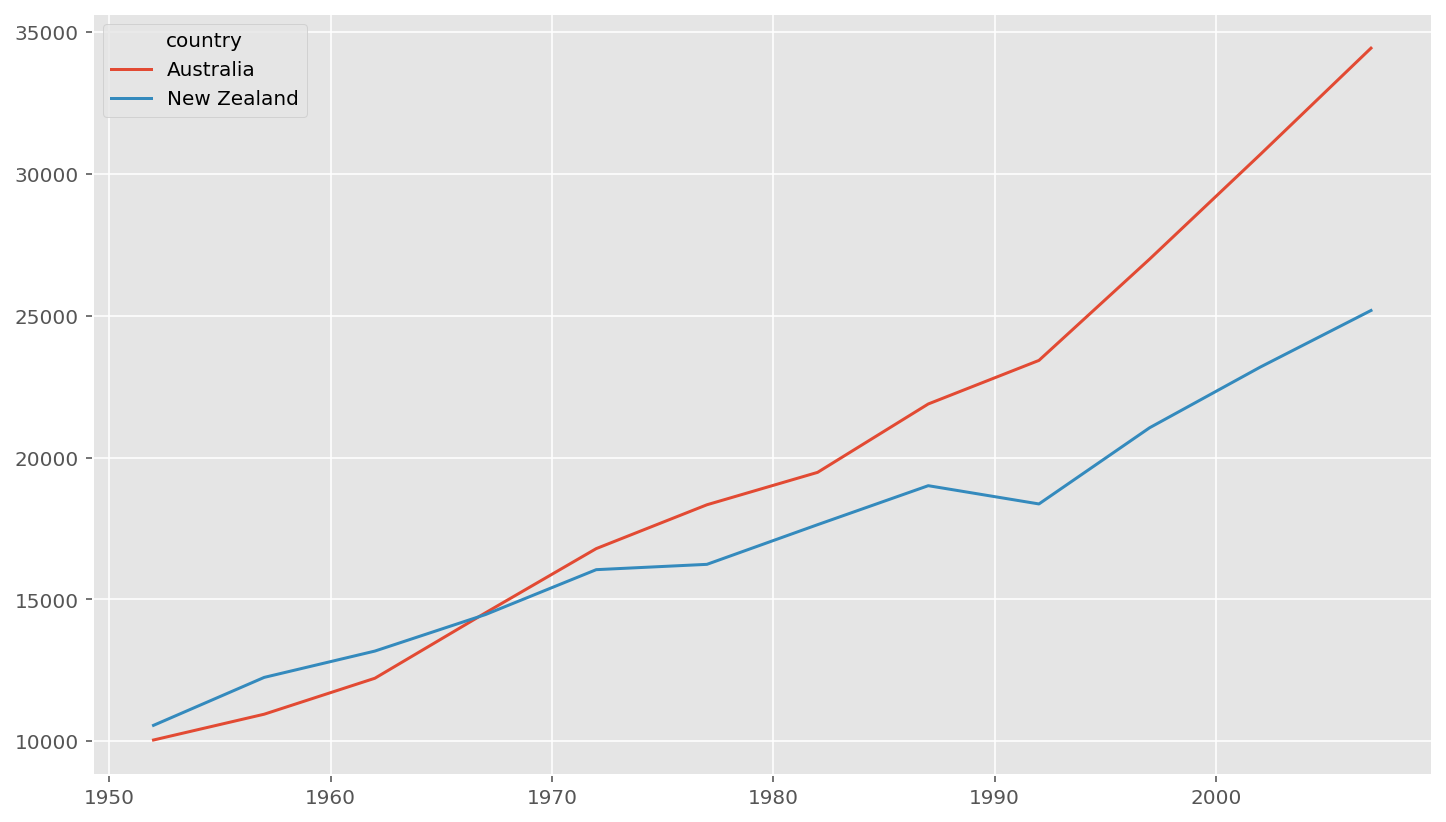

In [15]:
plt.style.use('ggplot')
data.T.plot()
plt.show()

One thing to keep in mind about style sheets is that one you set one using the `plt.style.use()` command, *every* subsequent plot you generate with Matplotlib will use that style, until you specify a new style. This is often desirable, as consistency in plot appearance is generally good practice. But it can come as a surprise to new users. 

For example, if we execute exactly the same commands as above to generate a bar plot, it also inherits the `ggplot` style that we set:

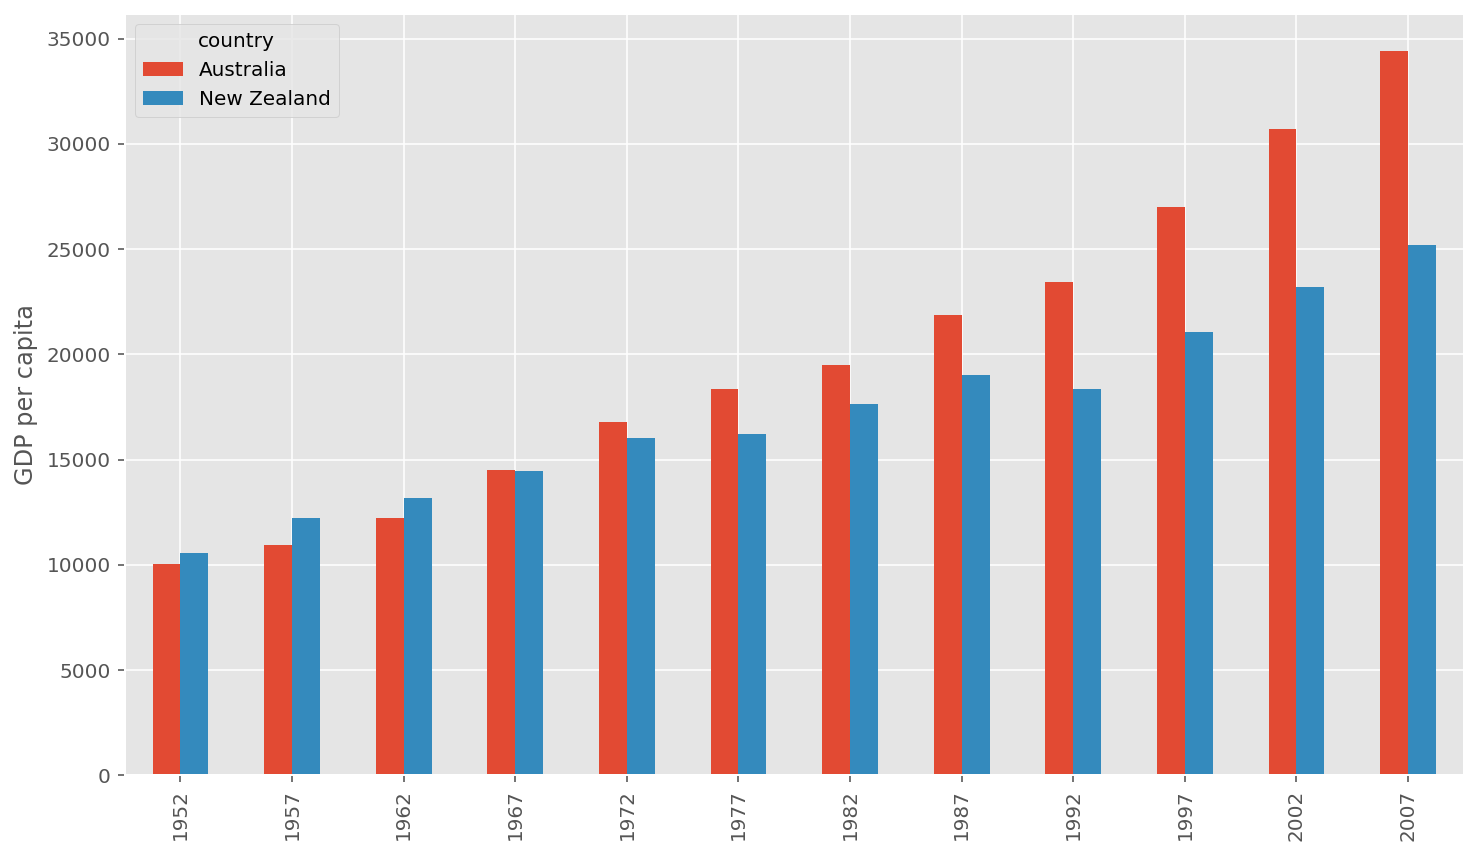

In [16]:
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.show()

You can always revert to Matplotlib's default style by setting the style to `default`:

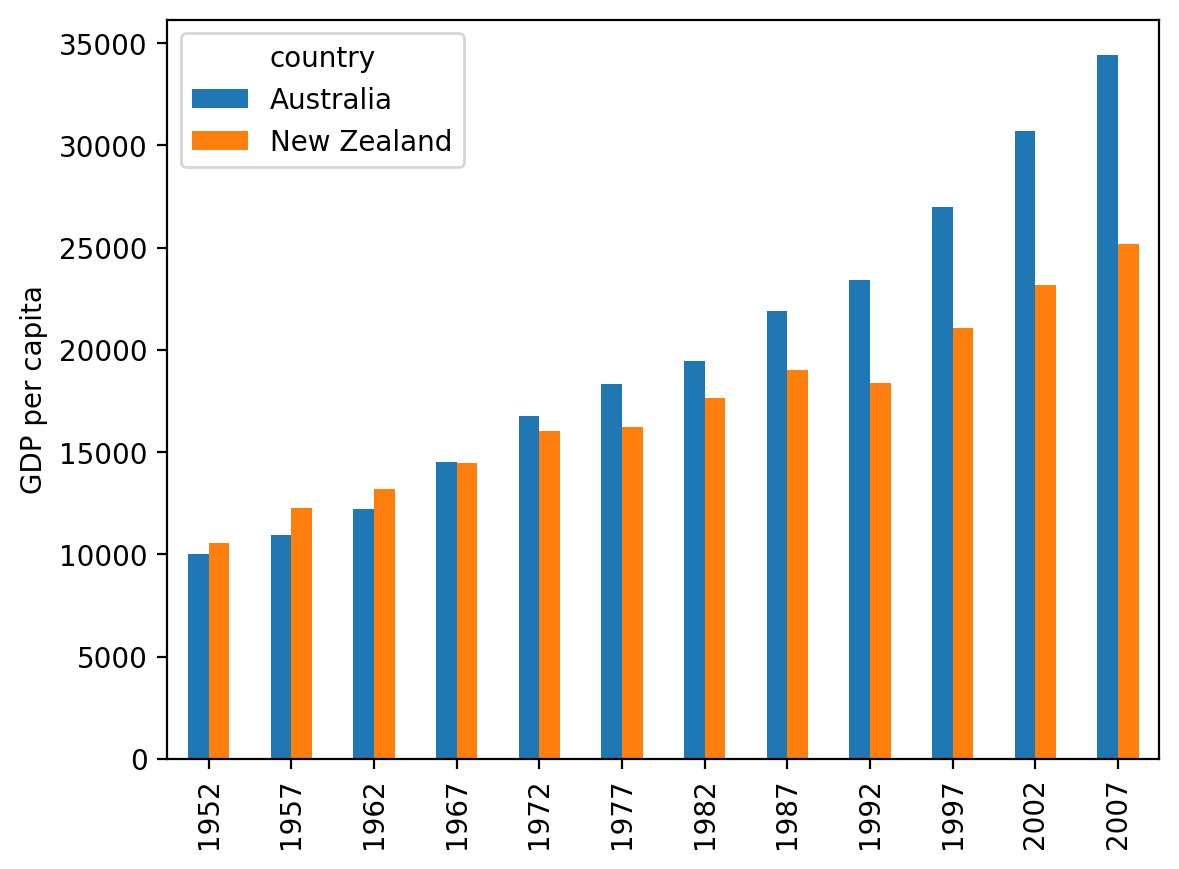

In [17]:
plt.style.use('default')
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.show()

---
## Exercises

### Minima and Maxima 

Fill in the blanks below to plot the minimum GDP per capita over time for all the countries in Europe. Modify it again to plot the maximum GDP per capita over time for Europe.

In [ ]:
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.____.plot(label='min')
data_europe.____
plt.legend(loc='best')
plt.xticks(rotation=90)

In [ ]:
## INSTRUCTOR ONLY
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)

### Correlations

Modify the example in the notes to create a scatter plot showing the relationship between the minimum and maximum GDP per capita among the countries in Asia for each year in the data set. What relationship do you see (if any)?


<AxesSubplot:xlabel='min', ylabel='max'>

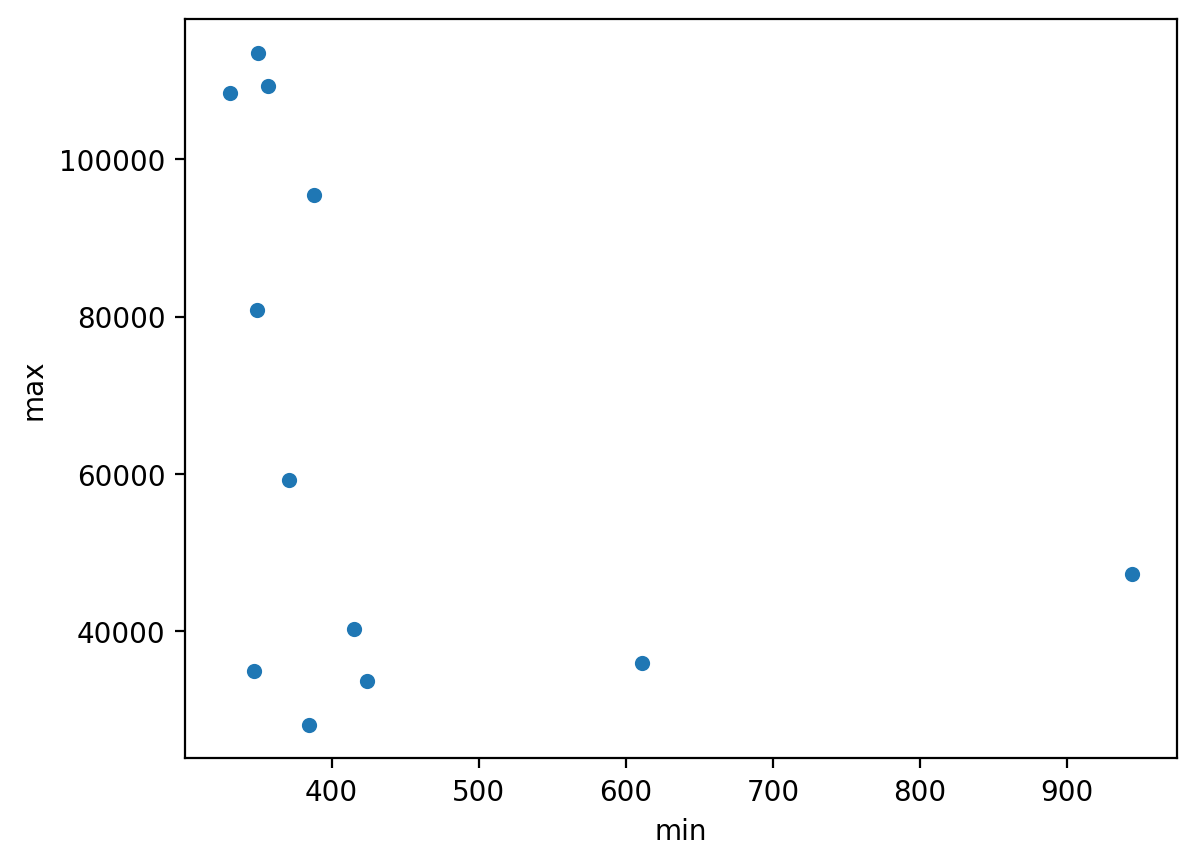

In [43]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

You might note that the variability in the maximum is much higher than that of the minimum. Take a look at the maximum and the max indexes:

In [ ]:
data_asia = pd.read_csv('data/gapminder_gdp_asia.csv', index_col='country')
data_asia.max().plot()
print(data_asia.idxmax())
print(data_asia.idxmin())

### More Correlations

This short program creates a plot showing the correlation between GDP and life expectancy for 2007, normalizing marker size by population:

In [ ]:
data_all = pd.read_csv('data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)

Using online help and other resources, explain what each argument to plot does.

## Saving your plot to a file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the matplotlib.pyplot module that accomplishes this: savefig. Calling this function, e.g. with

    plt.savefig('my_figure.png')

will save the current figure to the file `my_figure.png`. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

Note that functions in `plt` refer to a global figure variable and after a figure has been displayed to the screen (e.g. with `plt.show`) matplotlib will make this variable refer to a new empty figure. Therefore, make sure you call `plt.savefig` before the plot is displayed to the screen, otherwise you may find a file with an empty plot.

When using dataframes, data is often generated and plotted to screen in one line, and `plt.savefig` seems not to be a possible approach. One possibility to save the figure to file is then to save a reference to the current figure in a local variable (with `plt.gcf`) call the `savefig` class method from that variable.

    fig = plt.gcf() # get current figure
    data.plot(kind='bar')
    fig.savefig('my_figure.png')

### Making your plots accessible

Whenever you are generating plots to go into a paper or a presentation, there are a few things you can do to make sure that everyone can understand your plots:
- Always make sure your text is large enough to read. Use the `fontsize` parameter in `xlabel`, `ylabel`, `title`, and `legend`, and `tick_params` with `labelsize` to increase the text size of the numbers on your axes.
- Similarly, you should make your graph elements easy to see. Use `s` to increase the size of your scatterplot markers and `linewidth` to increase the sizes of your plot lines.
- Using `color` (and nothing else) to distinguish between different plot elements will make your plots *unreadable* to anyone who is colorblind, or who happens to have a black-and-white office printer. For lines, the `linestyle` parameter lets you use different types of lines. For scatterplots, `marker` lets you change the shape of your points. If you’re unsure about your colors, you can use [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) or [Color Oracle](https://colororacle.org/) to simulate what your plots would look like to those with colorblindness.

One easy way to increase the accessibility of your plots for different formats are a set of Matplotlib style sheets borrowed from the `seaborn` package. These include `seaborn-poster` for conference posters, and `seaborn-talk` for slide presentations.


In [52]:
plt.style.use('seaborn-talk')

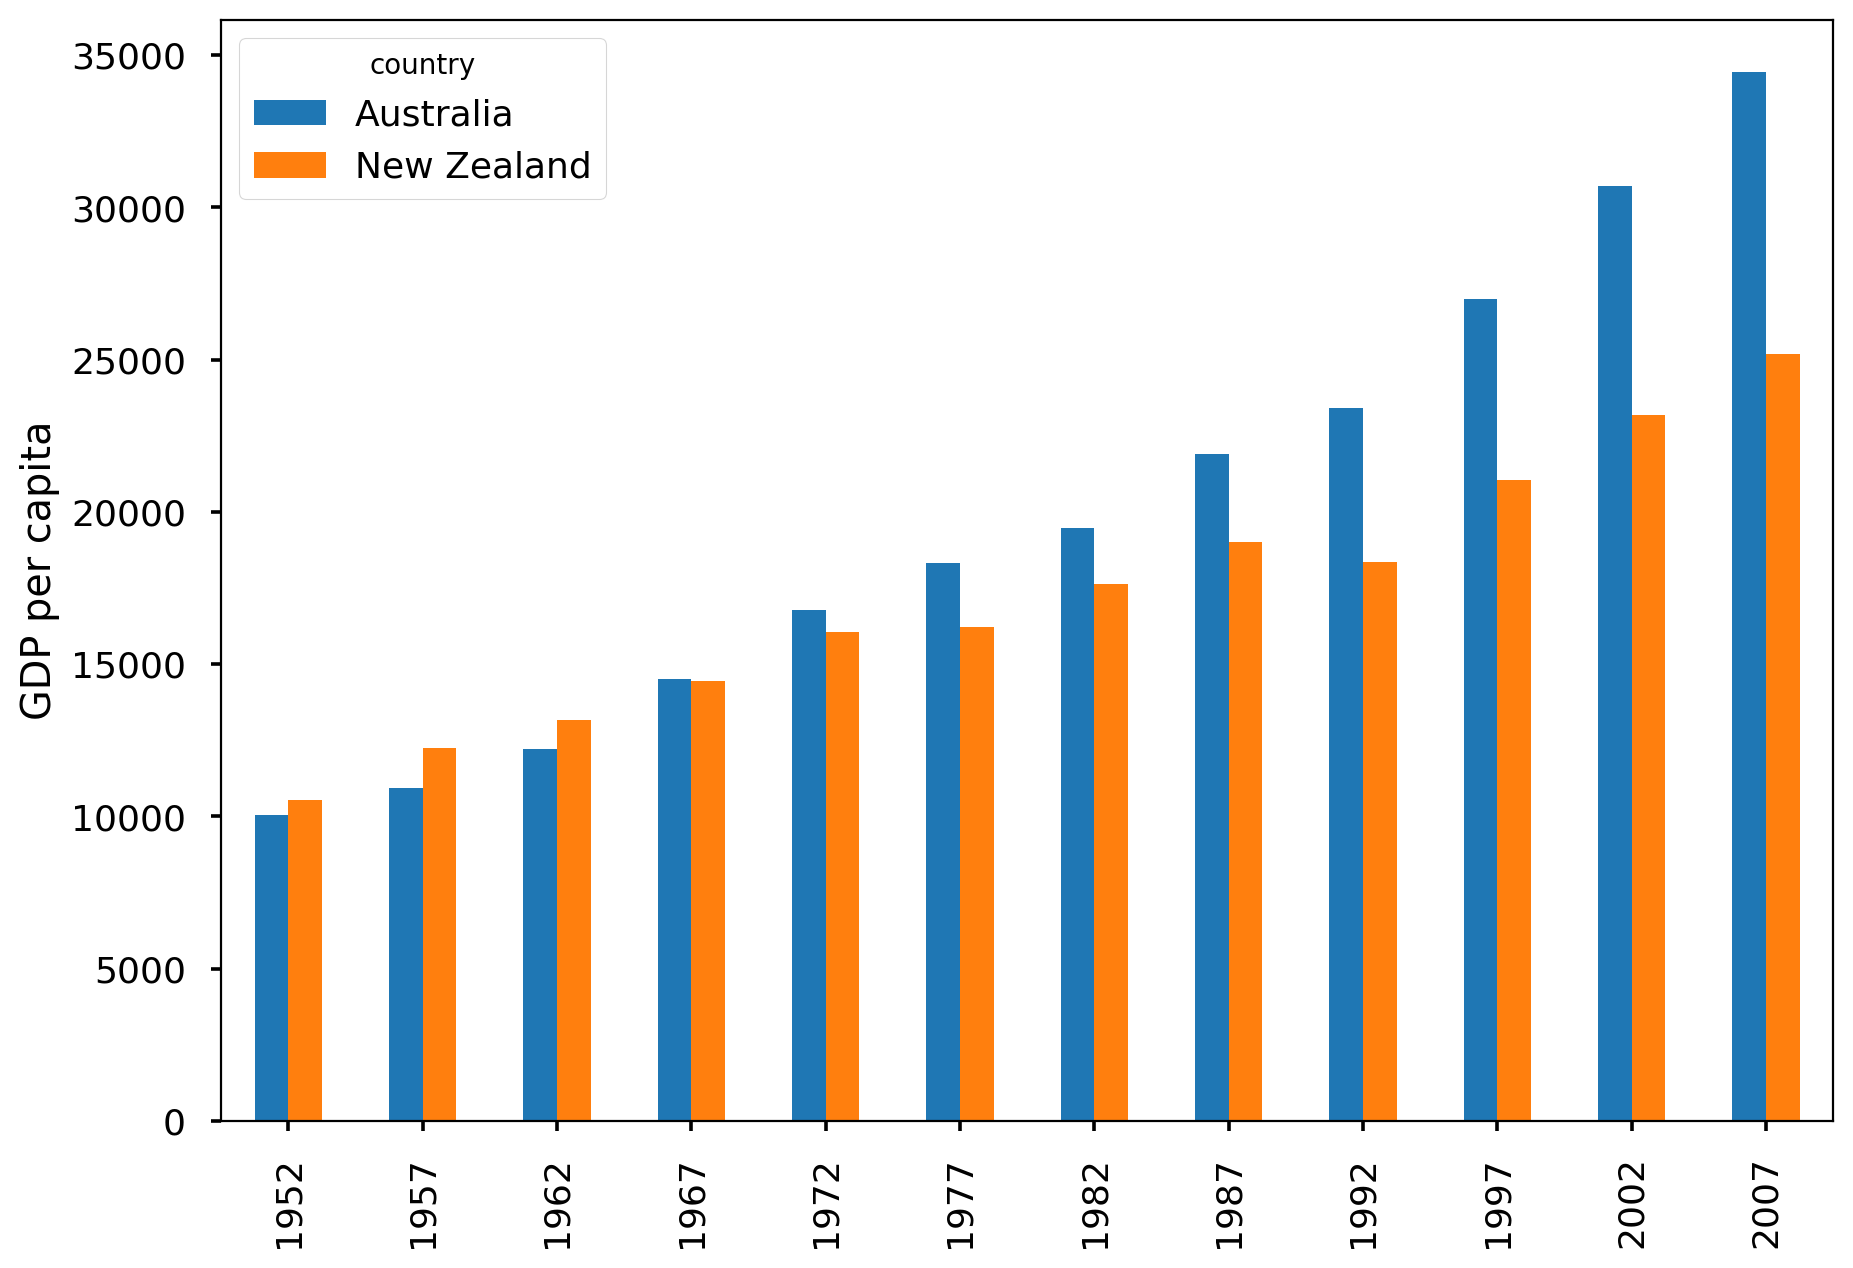

In [53]:
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.show()

You can see above that pandas + Matplotlib also recognizes the index of the DataFrame as labels, so a legend is automatically generated with the country names.

---
## Key Points

- Matplotlib is the most widely used scientific plotting library in Python.
- Methods allow you to plot data directly from a pandas dataframe.
- It is common to need to select and transform data, then plot it.
- Many styles of plot are available: see the [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) for more options.
- It's possible to plot many sets of data together